

## *SECTION 1 / SPRINT 1 / NOTE 3*

# Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자산총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자산총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [25]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
df2 = pd.read_csv(urlhead + '000890.csv') 
df3 = pd.read_csv(urlhead + '005300.csv') 
df4 = pd.read_csv(urlhead + '027740.csv') 
df5 = pd.read_csv(urlhead + '035810.csv') 
df6 = pd.read_csv(urlhead + '136480.csv') 

In [26]:
df_list = []


for i in [df1, df2, df3, df4, df5, df6]:
    i = i.T
    i = i.rename(columns = i.iloc[0]).drop('Unnamed: 0', axis = 0)
    
    i = i.iloc[0:1][['매출액','자산총계','EPS(원)']]
    
    df_list.append(i)
    
df1 = df_list[0]
df2 = df_list[1]
df3 = df_list[2]
df4 = df_list[3]
df5 = df_list[4]
df6 = df_list[5]    

In [27]:
df = pd.concat([df1,df2,df3,df4,df5,df6], axis = 0)

In [28]:
df['종목명'] = ['네이버','카카오','라인','쿠팡','당근마켓','토스']
df = df.reset_index().set_index('종목명')
df.drop('index', axis = 1, inplace = True)

In [31]:
for i in ['매출액','자산총계','EPS(원)'] :
    
    df['{}'.format(i)] = df['{}'.format(i)].apply(lambda x : x.replace(',',''))
    df['{}'.format(i)] = df['{}'.format(i)].astype(int)

In [32]:
df

매출액   자산총계  EPS(원)
종목명                      
네이버   5291  34061     363
카카오    196   1855      -2
라인    6775  36283   -5090
쿠팡     609   1990     -19
당근마켓  4071  17462     -16
토스    1968   8884    -376

## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [33]:
df_tidy = df.reset_index()               #인덱스 따로 빼기 

In [34]:
df_tidy = df_tidy.melt(id_vars = '종목명', value_vars = ['매출액','자산총계','EPS(원)'])
df_tidy

종목명 variable  value
0    네이버      매출액   5291
1    카카오      매출액    196
2     라인      매출액   6775
3     쿠팡      매출액    609
4   당근마켓      매출액   4071
5     토스      매출액   1968
6    네이버     자산총계  34061
7    카카오     자산총계   1855
8     라인     자산총계  36283
9     쿠팡     자산총계   1990
10  당근마켓     자산총계  17462
11    토스     자산총계   8884
12   네이버   EPS(원)    363
13   카카오   EPS(원)     -2
14    라인   EPS(원)  -5090
15    쿠팡   EPS(원)    -19
16  당근마켓   EPS(원)    -16
17    토스   EPS(원)   -376

### Tidy 표 만들기 & 되돌리기

방법 1 (Wide -> Tidy)

``` python

df = df.reset_index() # 인덱스를 빼서 칼럼으로 만들기 
df.melt(id_vars = '핵심 칼럼', value_vars = ['col1','col2']) # melt 함수를 이용해서 칼럼을 Tidy 자료형으로 바꾸기. 

```

방법 2 (tidy -> Wide) #피벗테이블

``` python
wide = df.pivot_table(index = '핵심 칼럼', columns = 'column', values = 'value')
wide
```

<AxesSubplot:xlabel='종목명', ylabel='value'>

C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-package

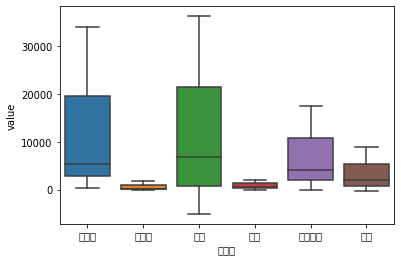

In [43]:
import seaborn as sns

sns.boxplot(data = df_tidy, x = '종목명', y = 'value')

In [47]:
res = len(df_tidy.종목명)
res

18

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [48]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [58]:
print(left)
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [57]:
df2 = pd.merge(left,right, how = 'left', on = ['key1', 'key2'])
df2

key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN

### merge() 함수

`-` 데이터 프레임들을 합치는 함수이다. 
`-` 단순히 프레임을 붙이는게 아니라 인덱스 혹은 지정 컬럼의 값들을 겹치게 병합해준다. 

``` python
pd.merge(df1, df2, how ='left', 'right', 'inner', 'outer', on = '속성명')

```

how에 따라 병합되는것이 다름 

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [ ]:
# 예시
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

/Users/jeongminhan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeongminhan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeongminhan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeongminhan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeongminhan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jeongminhan/opt/anaconda3/lib/

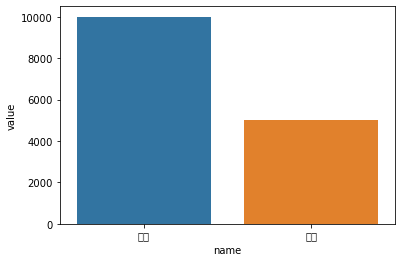

In [ ]:
sns.barplot(x = 'name', y = 'value', data = dat);

In [ ]:
# 한글 폰트 문제 해결 

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False
path='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)